In [19]:
#importing the libraries needed for reading the csv files 
import pandas as pd
import os
import pyspark

In [20]:
pwd #checking the default directory 

'C:\\Users\\sravan\\Downloads'

In [35]:
#reading data from the dataset using pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.read.csv(
    "athlete_events.csv", header=True, mode="DROPMALFORMED"
)



In [39]:
#reading data from the dataset using pandas
data = pd.read_csv("athlete_events.csv")
data.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [40]:
#reading data from the dataset using pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df_noc = spark.read.csv(
    "noc_regions.csv", header=True, mode="DROPMALFORMED"
)

In [41]:
#displaying the top 5 rows of athletes csv file
df.show(5)

+---+--------------------+---+---+------+------+--------------+---+-----------+----+------+---------+-------------+--------------------+-----+
| ID|                Name|Sex|Age|Height|Weight|          Team|NOC|      Games|Year|Season|     City|        Sport|               Event|Medal|
+---+--------------------+---+---+------+------+--------------+---+-----------+----+------+---------+-------------+--------------------+-----+
|  1|           A Dijiang|  M| 24|   180|    80|         China|CHN|1992 Summer|1992|Summer|Barcelona|   Basketball|Basketball Men's ...|   NA|
|  2|            A Lamusi|  M| 23|   170|    60|         China|CHN|2012 Summer|2012|Summer|   London|         Judo|Judo Men's Extra-...|   NA|
|  3| Gunnar Nielsen Aaby|  M| 24|    NA|    NA|       Denmark|DEN|1920 Summer|1920|Summer|Antwerpen|     Football|Football Men's Fo...|   NA|
|  4|Edgar Lindenau Aabye|  M| 34|    NA|    NA|Denmark/Sweden|DEN|1900 Summer|1900|Summer|    Paris|   Tug-Of-War|Tug-Of-War Men's ...| Gold|

#displaying the top 5 rows of noc regions csv file
df_noc.show(5)

In [42]:
#displaying the count of athlete dataframe
data.count()

ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64

In [43]:
#displaying the count of noc regions dataframe
df_noc.count()

230

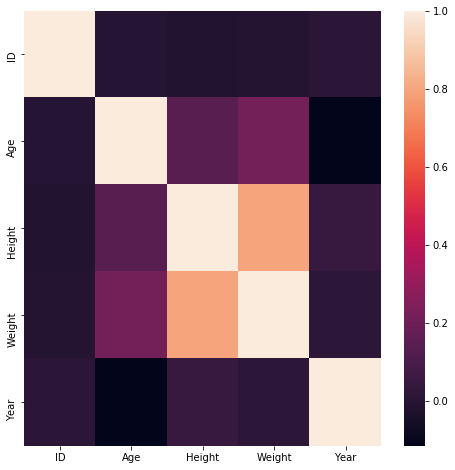

In [44]:
#calculation correlation between attributes in the dataset
import seaborn as sns
import matplotlib.pyplot as plt
#reading data from the dataset using pandas
data = pd.read_csv("athlete_events.csv")
data.head()

# calculate the correlation matrix
corr = data.corr()
plt.figure(figsize=(8,8)) 

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [45]:
#Sorting the years to know from which year sports information we have
b=data.Year.unique()
sorted(b)

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

In [24]:
#Knowing the starting age of persons who participated in the sports
a= data.Age.unique()
sorted(a)

[14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 45.0,
 46.0,
 47.0,
 49.0,
 53.0,
 54.0,
 57.0,
 nan,
 10.0,
 11.0,
 12.0,
 13.0,
 44.0,
 48.0,
 50.0,
 51.0,
 52.0,
 55.0,
 56.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 80.0,
 81.0,
 84.0,
 88.0,
 96.0,
 97.0]

In [46]:
#Persons who participated more than one time in different games
data.Name.value_counts(dropna = False)[:20]

Robert Tait McKenzie                58
Heikki Ilmari Savolainen            39
Joseph "Josy" Stoffel               38
Ioannis Theofilakis                 36
Takashi Ono                         33
Alfrd (Arnold-) Hajs (Guttmann-)    32
Andreas Wecker                      32
Alexandros Theofilakis              32
Jean Lucien Nicolas Jacoby          32
Alfred August "Al" Jochim           31
Johann "Hans" Sauter                31
Alfred James Munnings               31
Michel Mathiot                      31
Karl Tore William Thoresson         30
Michael Fred Phelps, II             30
Yordan Yovchev Yovchev              30
Ivan Joseph Martin Osiier           29
Oksana Aleksandrovna Chusovitina    29
Miltiades Manno                     28
Ole Einar Bjrndalen                 27
Name: Name, dtype: int64

In [47]:
#the participated cities all over the countries in Rio Olympics.
data.City.value_counts(dropna = False)

London                    22426
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Los Angeles               12423
Seoul                     12037
Munich                    10304
Montreal                   8641
Mexico City                8588
Helsinki                   8270
Roma                       8119
Tokyo                      7702
Moskva                     7191
Paris                      7169
Berlin                     6506
Amsterdam                  4992
Sochi                      4891
Melbourne                  4829
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sarajevo

In [48]:
#Missing Values from athletes data
data.isnull().sum()
#we can see that the attributes Age, Height, Weight and Medal have missing values in the dataset.


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [49]:
data.describe()

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

In [50]:
#value_counts function used to get the series containing the counts of unique values.
data.Medal.value_counts(dropna = False)

NaN       231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64

In [51]:
#Summer and Winter participants
data.Season.value_counts(dropna = False)

Summer    222552
Winter     48564
Name: Season, dtype: int64

In [53]:
#fillig missing values with mean
import numpy as np
data['Age'].fillna((data['Age'].mean()), inplace=True)
#data.Age[140:150]
data['Height'].fillna((data['Height'].mean()), inplace=True)
#data.Height[:10]
data['Weight'].fillna((data['Weight'].mean()), inplace = True)
#data.Weight[:10]
data['Medal'].fillna(0, inplace=True)
#data.Medal[:10]

In [54]:
data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [55]:
#Creating a new column (age_level) to dataset
age_average=data.Age.mean()
print("Average Age:",age_average)
data["Age_Level"]=["Old" if item>age_average else "Young" for item in data.Age]
data.loc[0:5,["Age_Level","Name","Age"]]


Average Age: 25.55689835729893


Age_Level                      Name   Age
0     Young                 A Dijiang  24.0
1     Young                  A Lamusi  23.0
2     Young       Gunnar Nielsen Aaby  24.0
3       Old      Edgar Lindenau Aabye  34.0
4     Young  Christine Jacoba Aaftink  21.0
5     Young  Christine Jacoba Aaftink  21.0

In [56]:
#creating the new attribute Age_Level to the dataset
data.head()

ID                      Name Sex   Age     Height     Weight  \
0   1                 A Dijiang   M  24.0  180.00000  80.000000   
1   2                  A Lamusi   M  23.0  170.00000  60.000000   
2   3       Gunnar Nielsen Aaby   M  24.0  175.33897  70.702393   
3   4      Edgar Lindenau Aabye   M  34.0  175.33897  70.702393   
4   5  Christine Jacoba Aaftink   F  21.0  185.00000  82.000000   

             Team  NOC        Games  Year  Season       City          Sport  \
0           China  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1           China  CHN  2012 Summer  2012  Summer     London           Judo   
2         Denmark  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4     Netherlands  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal Age_Level  
0       Basketball Men's Basketball     0     Young  
1      Judo Men's Extra-Lightweight     0     Young  
2           Football Men's Football     0     Young  
3       Tug-Of-War Men's Tug-Of-War  Gold       Old  
4  Speed Skating Women's 500 metres     0     Young

In [57]:
data.Sex.value_counts(dropna = False)

M    196594
F     74522
Name: Sex, dtype: int64

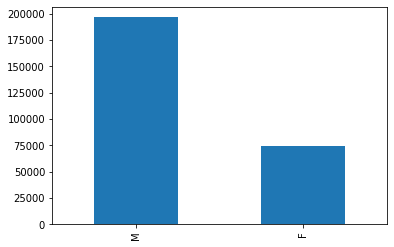

In [58]:
#Comparing male and female participants in olympics
import pandas as pd
df = pd.DataFrame(data)
df['Sex'].value_counts().plot(kind='bar')

In [59]:
#visualising summer and winter olympics data seperately
summer_data = data.loc[data['Season']=='Summer']
summer_data.head()

ID                                Name Sex   Age     Height     Weight  \
0    1                           A Dijiang   M  24.0  180.00000  80.000000   
1    2                            A Lamusi   M  23.0  170.00000  60.000000   
2    3                 Gunnar Nielsen Aaby   M  24.0  175.33897  70.702393   
3    4                Edgar Lindenau Aabye   M  34.0  175.33897  70.702393   
26   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0  168.00000  70.702393   

              Team  NOC        Games  Year  Season         City       Sport  \
0            China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1            China  CHN  2012 Summer  2012  Summer       London        Judo   
2          Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3   Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
26     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                           Event Medal Age_Level  
0    Basketball Men's Basketball     0     Young  
1   Judo Men's Extra-Lightweight     0     Young  
2        Football Men's Football     0     Young  
3    Tug-Of-War Men's Tug-Of-War  Gold       Old  
26  Athletics Women's 100 metres     0     Young

M    163109
F     59443
Name: Sex, dtype: int64

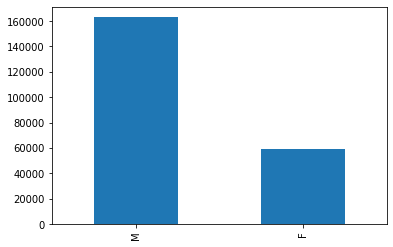

In [60]:
df2 = pd.DataFrame(summer_data)
df2['Sex'].value_counts().plot(kind='bar')
df2['Sex'].value_counts()

In [61]:
winter_data = data.loc[data['Season']== 'Winter']
winter_data.head()

ID                      Name Sex   Age  Height  Weight         Team  NOC  \
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0  Netherlands  NED   
5   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0  Netherlands  NED   
6   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0  Netherlands  NED   
7   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0  Netherlands  NED   
8   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0  Netherlands  NED   

         Games  Year  Season         City          Sport  \
4  1988 Winter  1988  Winter      Calgary  Speed Skating   
5  1988 Winter  1988  Winter      Calgary  Speed Skating   
6  1992 Winter  1992  Winter  Albertville  Speed Skating   
7  1992 Winter  1992  Winter  Albertville  Speed Skating   
8  1994 Winter  1994  Winter  Lillehammer  Speed Skating   

                                Event Medal Age_Level  
4    Speed Skating Women's 500 metres     0     Young  
5  Speed Skating Women's 1,000 metres     0     Young  
6    Speed Skating Women's 500 metres     0     Young  
7  Speed Skating Women's 1,000 metres     0     Young  
8    Speed Skating Women's 500 metres     0       Old

M    33485
F    15079
Name: Sex, dtype: int64


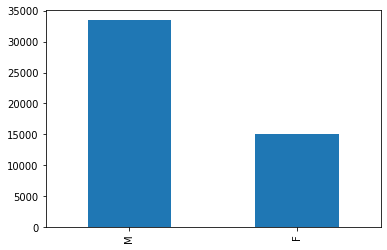

In [62]:
df3 = pd.DataFrame(winter_data)
print(df3['Sex'].value_counts())
df3['Sex'].value_counts().plot(kind='bar')

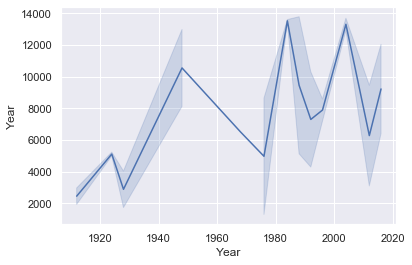

In [63]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
y= summer_data['Year'].value_counts()
sns.lineplot(x = summer_data.Year, y = y, data = summer_data)

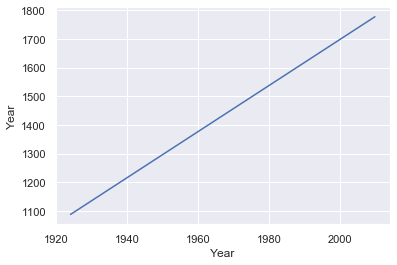

In [64]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
z = winter_data['Year'].value_counts()
sns.lineplot(x = winter_data.Year, y = z, data = winter_data)

0         231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64


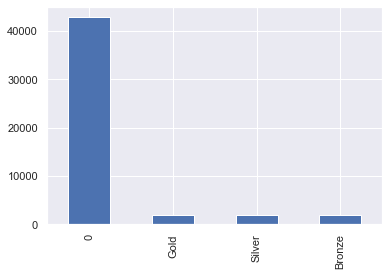

In [65]:
df4 = pd.DataFrame(data)
print(df4['Medal'].value_counts())
df3['Medal'].value_counts().plot(kind='bar')

In [66]:
data.City.value_counts()

London                    22426
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Los Angeles               12423
Seoul                     12037
Munich                    10304
Montreal                   8641
Mexico City                8588
Helsinki                   8270
Roma                       8119
Tokyo                      7702
Moskva                     7191
Paris                      7169
Berlin                     6506
Amsterdam                  4992
Sochi                      4891
Melbourne                  4829
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sarajevo

In [67]:
medal_data = data[(data.Medal=='Gold') & (data.City=='London')]
len(medal_data)
print(medal_data)

            ID                     Name Sex   Age     Height      Weight  \
42          17  Paavo Johannes Aaltonen   M  28.0  175.00000   64.000000   
44          17  Paavo Johannes Aaltonen   M  28.0  175.00000   64.000000   
48          17  Paavo Johannes Aaltonen   M  28.0  175.00000   64.000000   
174         73                Luc Abalo   M  27.0  182.00000   86.000000   
1126       629        William Accambray   M  24.0  194.00000  104.000000   
...        ...                      ...  ..   ...        ...         ...   
270326  135228      Epke Jan Zonderland   M  26.0  173.00000   69.000000   
270434  135269                  Zou Kai   M  24.0  158.00000   55.000000   
270435  135269                  Zou Kai   M  24.0  158.00000   55.000000   
270440  135270              Zou Shiming   M  31.0  165.00000   49.000000   
270896  135474     Albert Hermann Zrner   M  18.0  175.33897   70.702393   

               Team  NOC        Games  Year  Season    City       Sport  \
42          

In [68]:
medal_data1 = (data.Medal=='Gold') 
len(medal_data1)

271116

In [70]:
medal_data2 = (data.Medal=='Bronze') 
#len(medal_data2)
medal_data3 = (data.Medal=='Silver') 
len(medal_data3)

271116

In [71]:
#conda install -c conda-forge wordcloud


In [72]:
pip install

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


In [73]:
# Start with loading all necessary libraries
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [74]:
import warnings
warnings.filterwarnings("ignore")

In [76]:
data.Sport.value_counts(dropna = False)[:10]

Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10859
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: Sport, dtype: int64

In [78]:
#word cloud for sports variable in the dataset
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
new_stopwords=stopwords.union(["Name","dtype","object","Length","Luge","Tug"])
import matplotlib.pyplot as plt
text = data.Sport
# Create and generate a word cloud image:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white', max_words=50,
    stopwords = new_stopwords).generate(str(text))
fig = plt.figure(
    figsize = (30, 30),
    facecolor = 'k',
    edgecolor = 'k')
# Display the generated image:
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

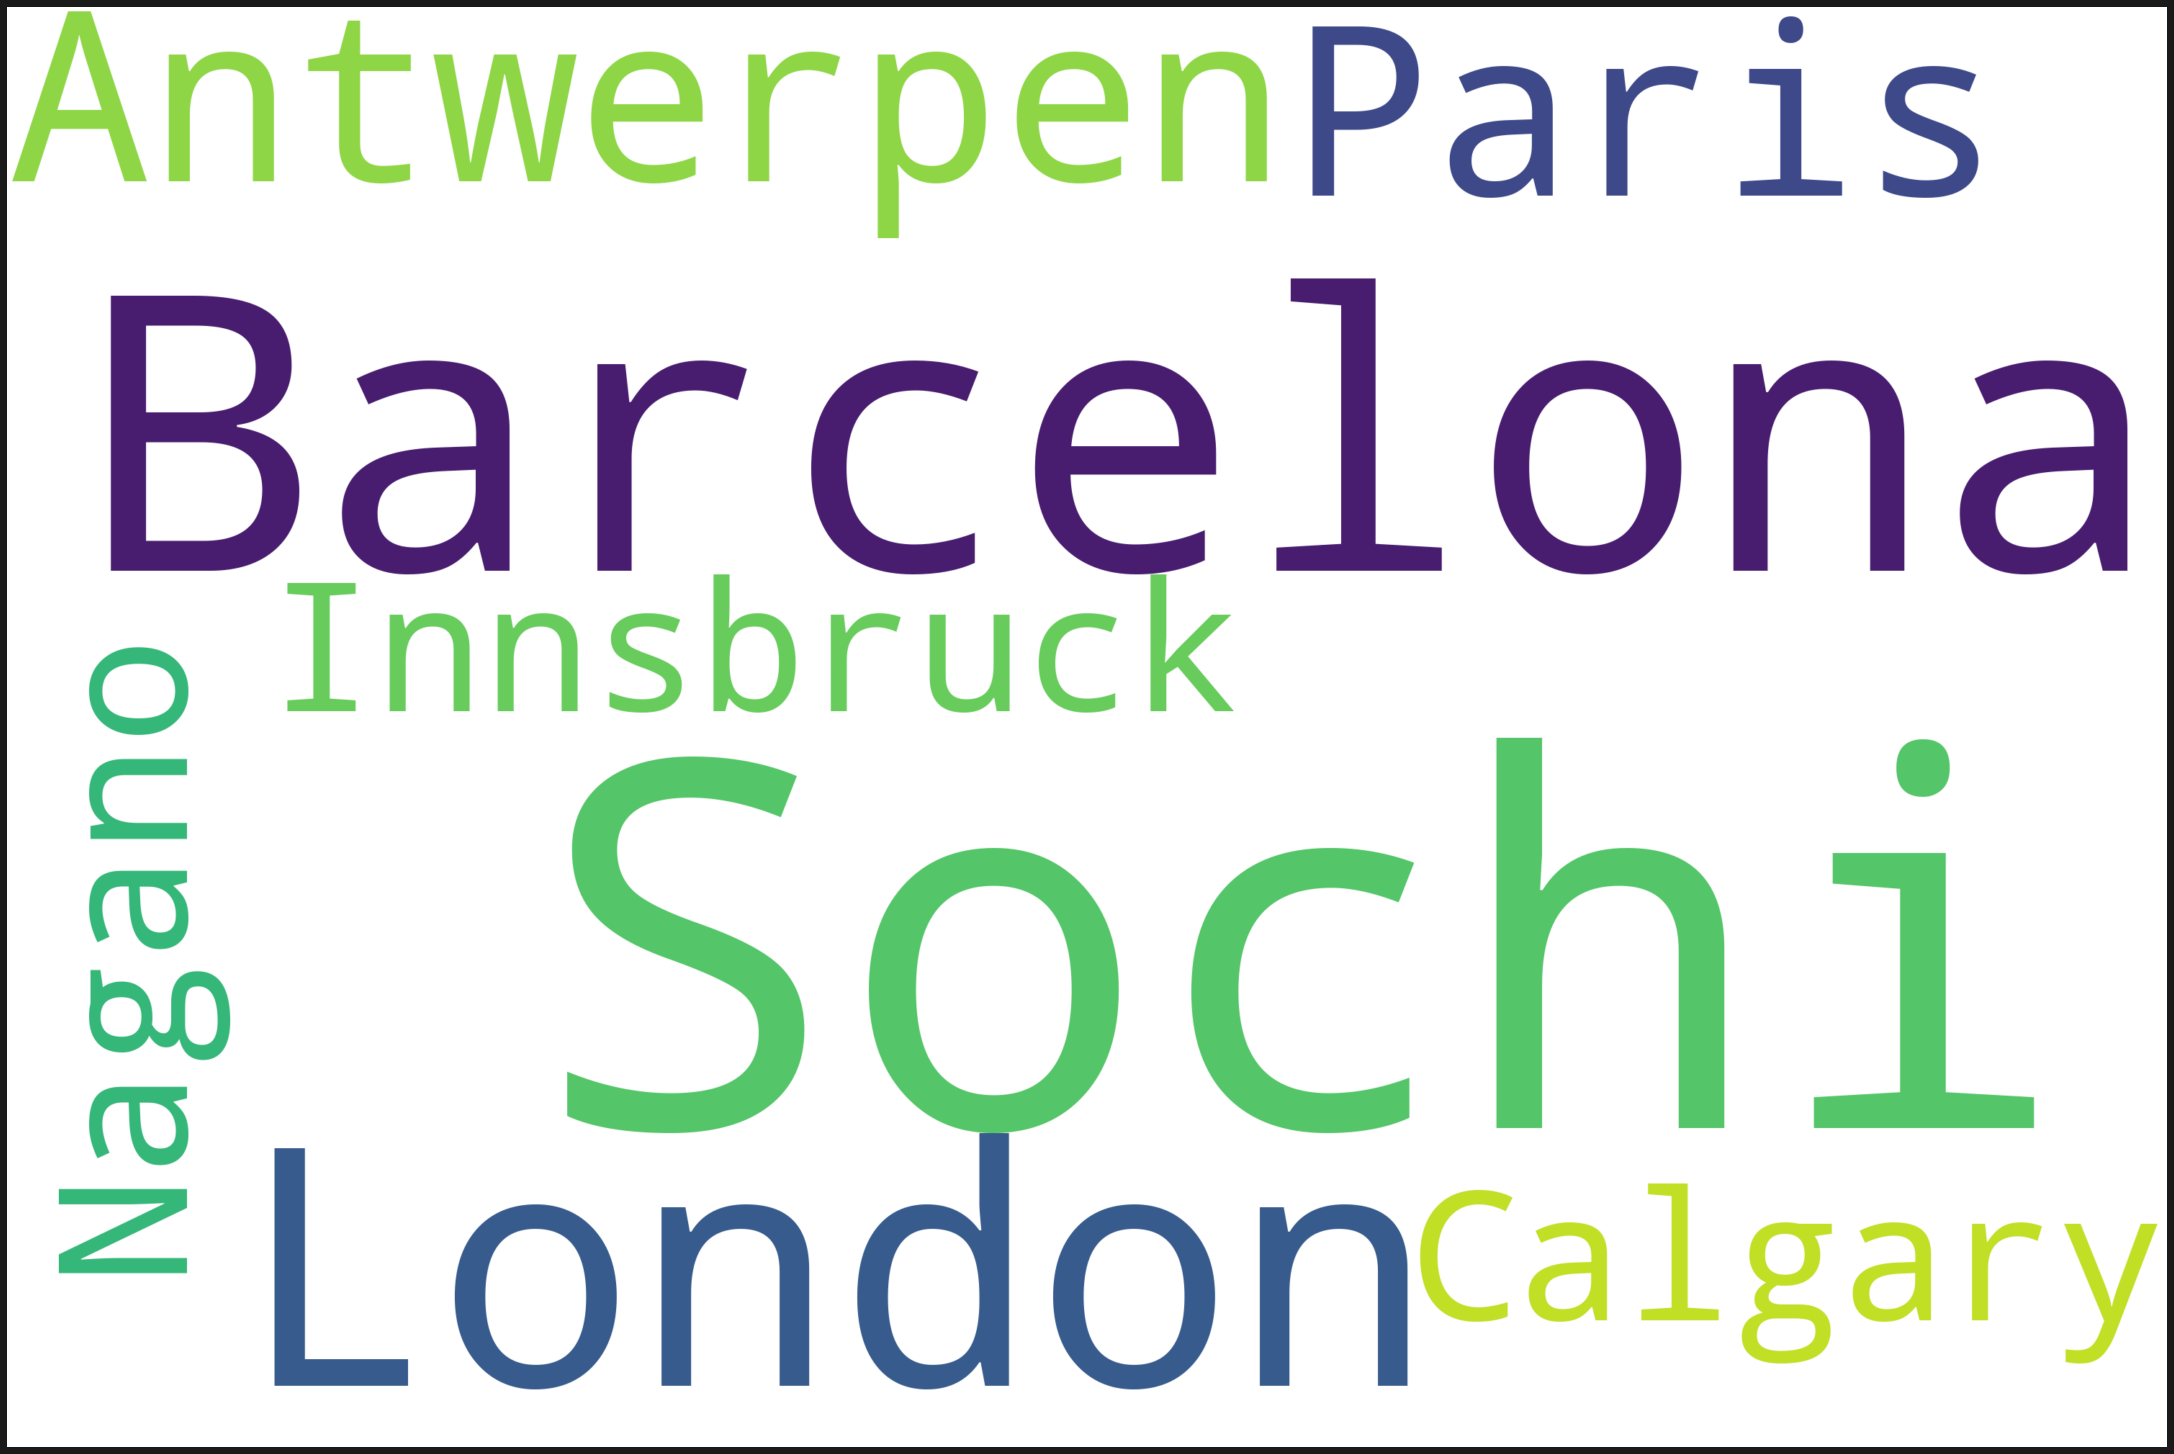

In [61]:
#word cloud for city variable in the dataset
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
new_stopwords=stopwords.union(["Name","dtype","object","Length","Lake","Salt","City"])
import matplotlib.pyplot as plt
text = data.City
# Create and generate a word cloud image:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white', max_words=50,
    stopwords = new_stopwords).generate(str(text))
fig = plt.figure(
    figsize = (30, 30),
    facecolor = 'k',
    edgecolor = 'k')
# Display the generated image:
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()